In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [2]:
cleaned_df = pd.read_pickle('df_clean.pkl')
cleaned_df.head(5)

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
id,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da..."
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli..."
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da..."
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater..."
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da..."


In [3]:
cleaned_df['lemma_str'] = [' '.join(map(str, l)) for l in cleaned_df['lemmatized']]

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(cleaned_df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [5]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,abc,absolutely,access,accountable,accuse,across,act,action,activist,actually,...,write,wrong,xiii,yall,year,yes,yet,young,youre,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
nmf = NMF(n_components=10, random_state=0, alpha=.1).fit(tfidf)

In [7]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                           for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [8]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
water crisis donate bottle flint via epa official million help
Topic 1:
flintwatercrisis arrestgovsnyder rt http help need amp flintwater petition donate
Topic 2:
take still one bath friendly gallon reminder hour water flint
Topic 3:
lead poison resident kid black poor http hospital water child
Topic 4:
money clean go war drinking much iraq enough somehow provide
Topic 5:
flint people mi help amp like see need look city
Topic 6:
obama emergency declare president sign state federal declaration order aid
Topic 7:
michigan governor flint resign must people state city leadpoisoning statement
Topic 8:
clinton sander hillary debate bernie demdebate call democratic get vote
Topic 9:
snyder gov rick resign call email snyders governor testify congress


In [9]:
nmf_topic_values = nmf.transform(tfidf)
cleaned_df['nmf_topics'] = nmf_topic_values.argmax(axis=1)

In [10]:
nmf_remap = {
    0: 'Donate to help water crisis',
    1: 'Arrest Governor Snyder',
    2: 'Conserve Water',
    3: 'Black children\'s water is poisoned',
    4: 'Not enough funding going to Flint water crisis',
    5: 'Help Flint people',
    6: 'President Obama declares emergency in Michigan',
    7: 'Governor Snyder should resign',
    8: 'Democratic debate for votes',
    9: 'Governor Snyder shoudl resign and testify in front of Congress'
}

In [11]:
cleaned_df['nmf_topics'] = cleaned_df['nmf_topics'].map(nmf_remap)
cleaned_df.head(5)

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,nmf_topics
id,,,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,Arrest Governor Snyder
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli...",thank republican party # michigan # flintwater...,Governor Snyder should resign
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,Arrest Governor Snyder
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater...",snyder still wont say knew # flintwatercrisis ...,Governor Snyder shoudl resign and testify in f...
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,Arrest Governor Snyder


<h2>Overall Frequency of Topics

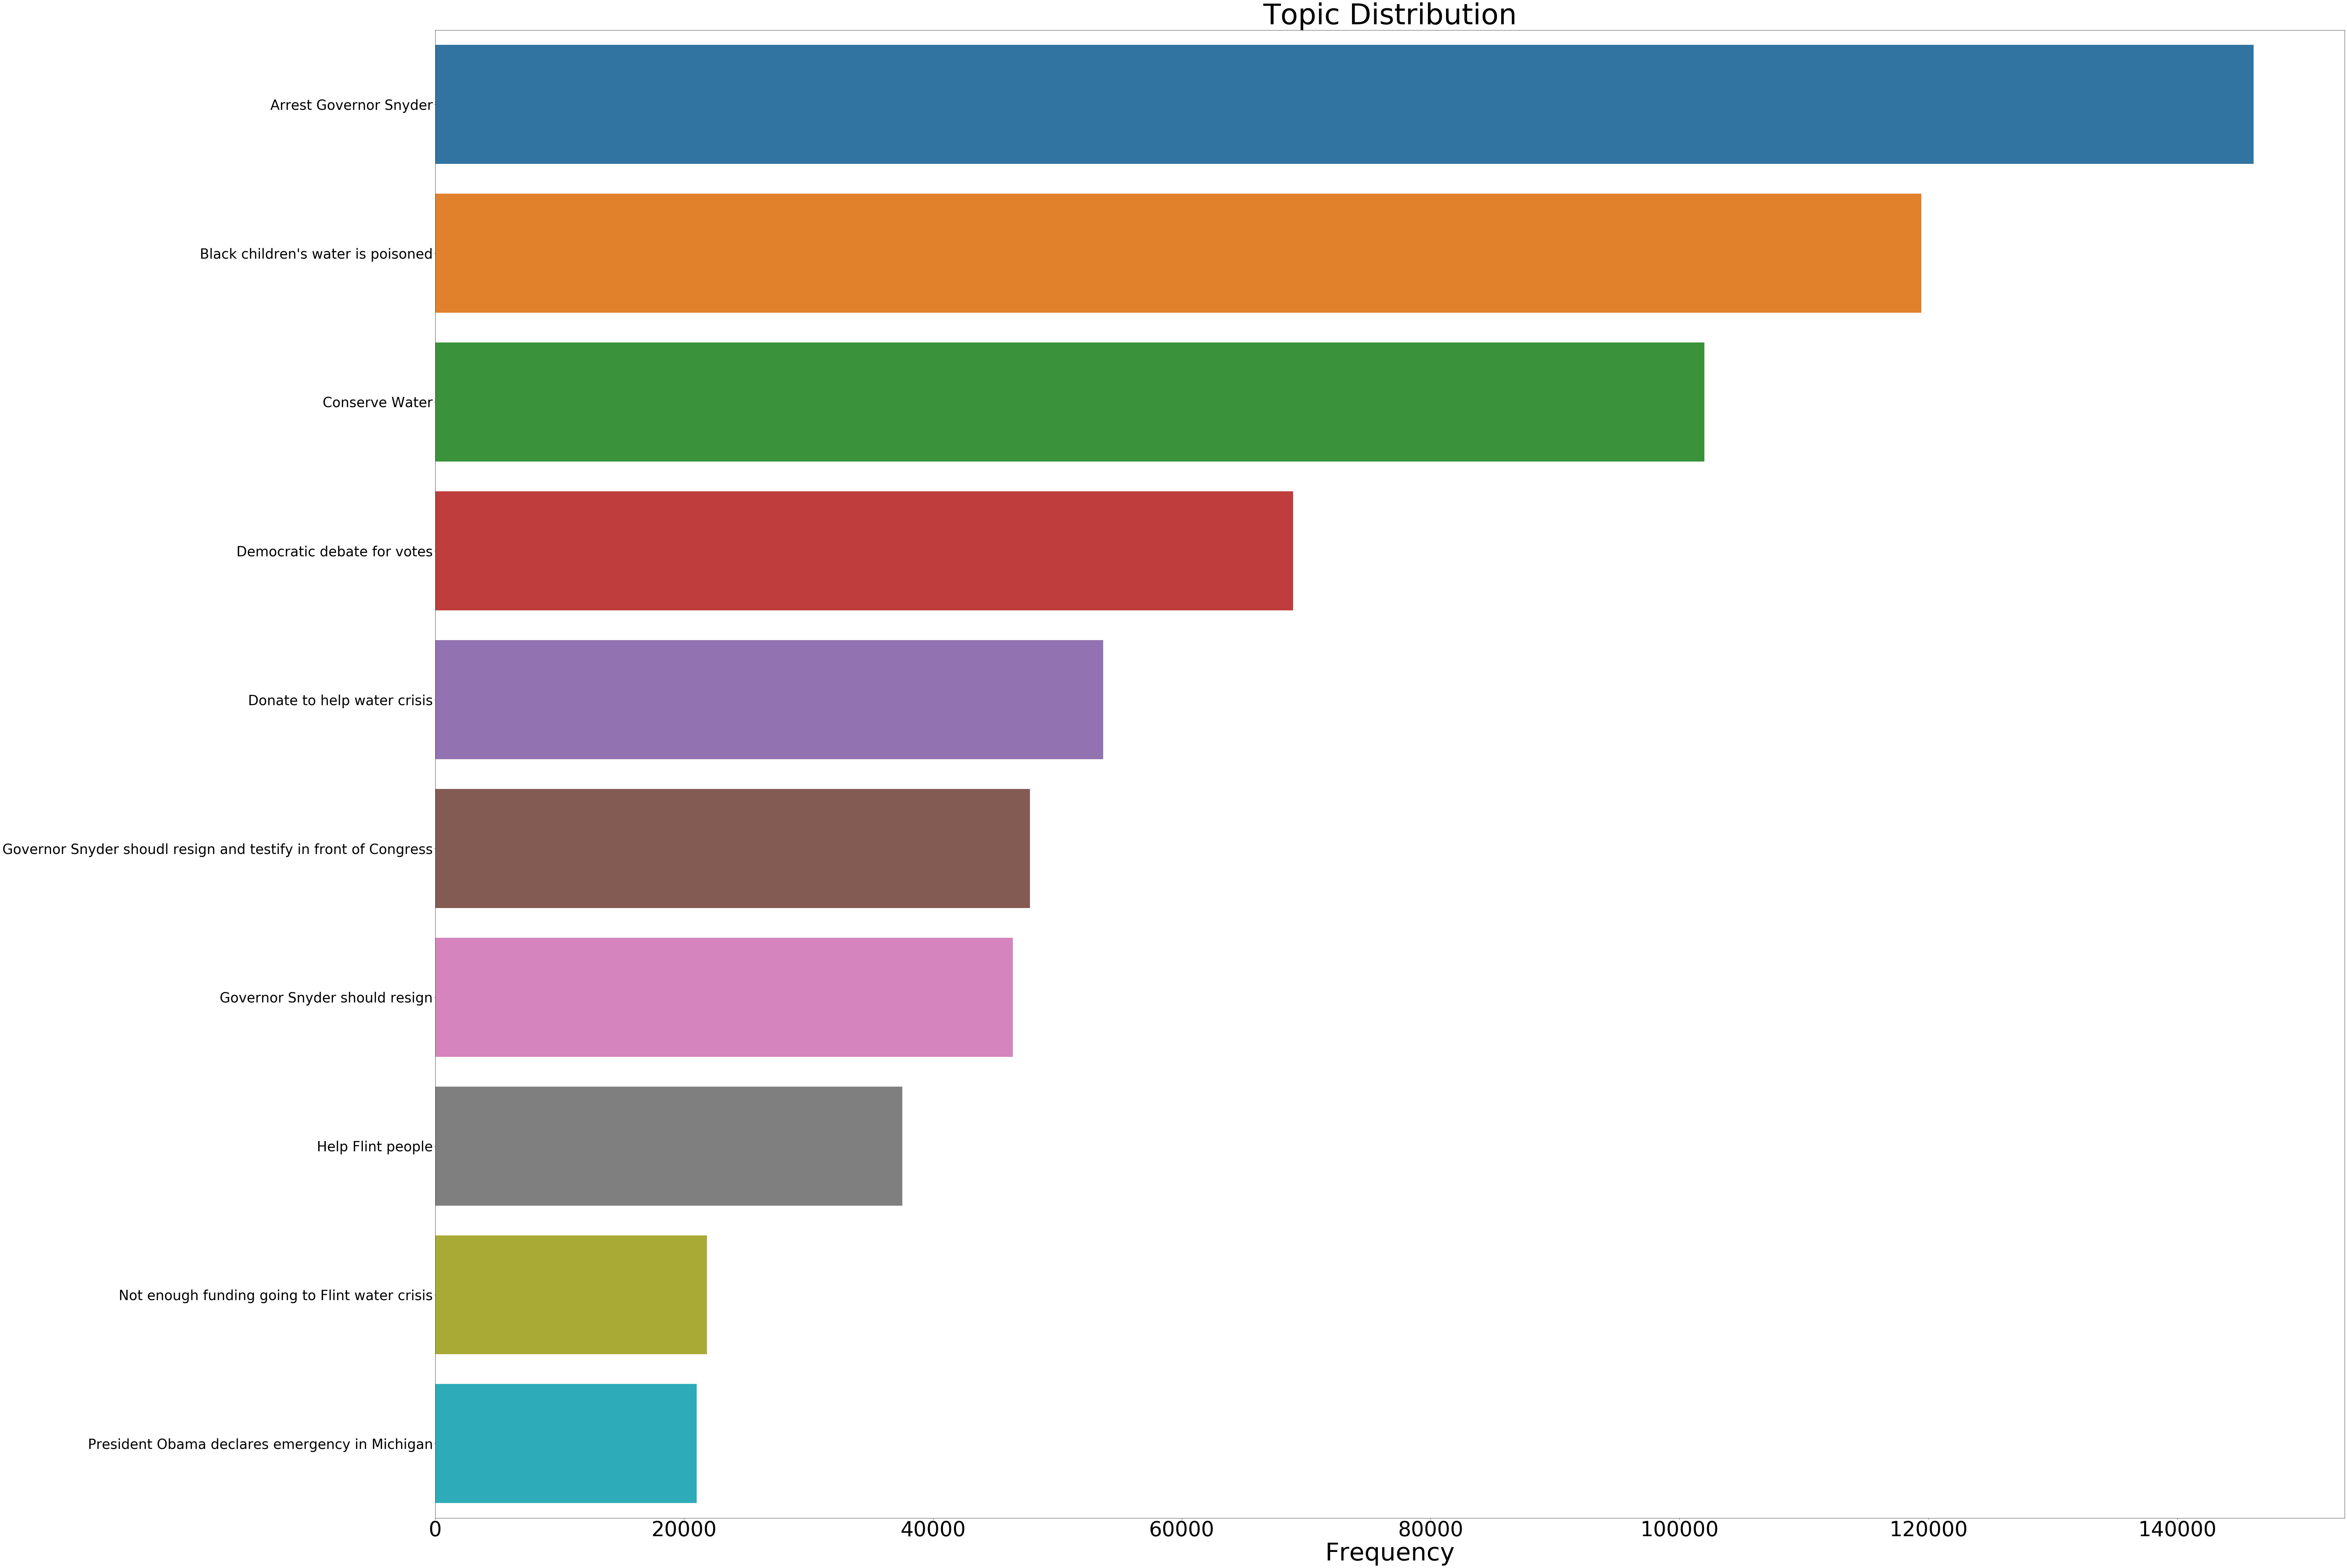

In [12]:
# generate the plot for distribution of topics by entire dataframe
nmf_x = cleaned_df.nmf_topics.value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(100, 80))
sns.barplot(nmf_x, nmf_y.index)
plt.title("Topic Distribution", fontsize=84)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=72)
plt.xticks(fontsize=60)
plt.show()

<h2>Overall Topic Distribution by Month

In [13]:
df = cleaned_df
df.sort_values(by='created_at')

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,nmf_topics
id,,,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,Arrest Governor Snyder
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli...",thank republican party # michigan # flintwater...,Governor Snyder should resign
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,Arrest Governor Snyder
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater...",snyder still wont say knew # flintwatercrisis ...,Governor Snyder shoudl resign and testify in f...
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,Arrest Governor Snyder


In [14]:
# gets data by month
monthly_data = []
min_month = df.created_at.min().month
max_month = df.created_at.max().month

for i in range(min_month, max_month + 1):
    monthly_df = df[df['created_at'].dt.month == i]
    monthly_data.append(monthly_df)

In [15]:
# parameters(dataframe for the month, string for the month)
def show_topic_histograms(df, month):
    nmf_x = df.nmf_topics.value_counts()
    nmf_y = nmf_x.sort_index()
    plt.figure(figsize=(100, 80))
    sns.barplot(nmf_x, nmf_y.index)
    plt.title("Overall Topic Distribution for Month " + month, fontsize=84)
    plt.yticks(fontsize=40)
    plt.xlabel('Frequency', fontsize=72)
    plt.xticks(fontsize=60)
    plt.show()
    print("\n\n")

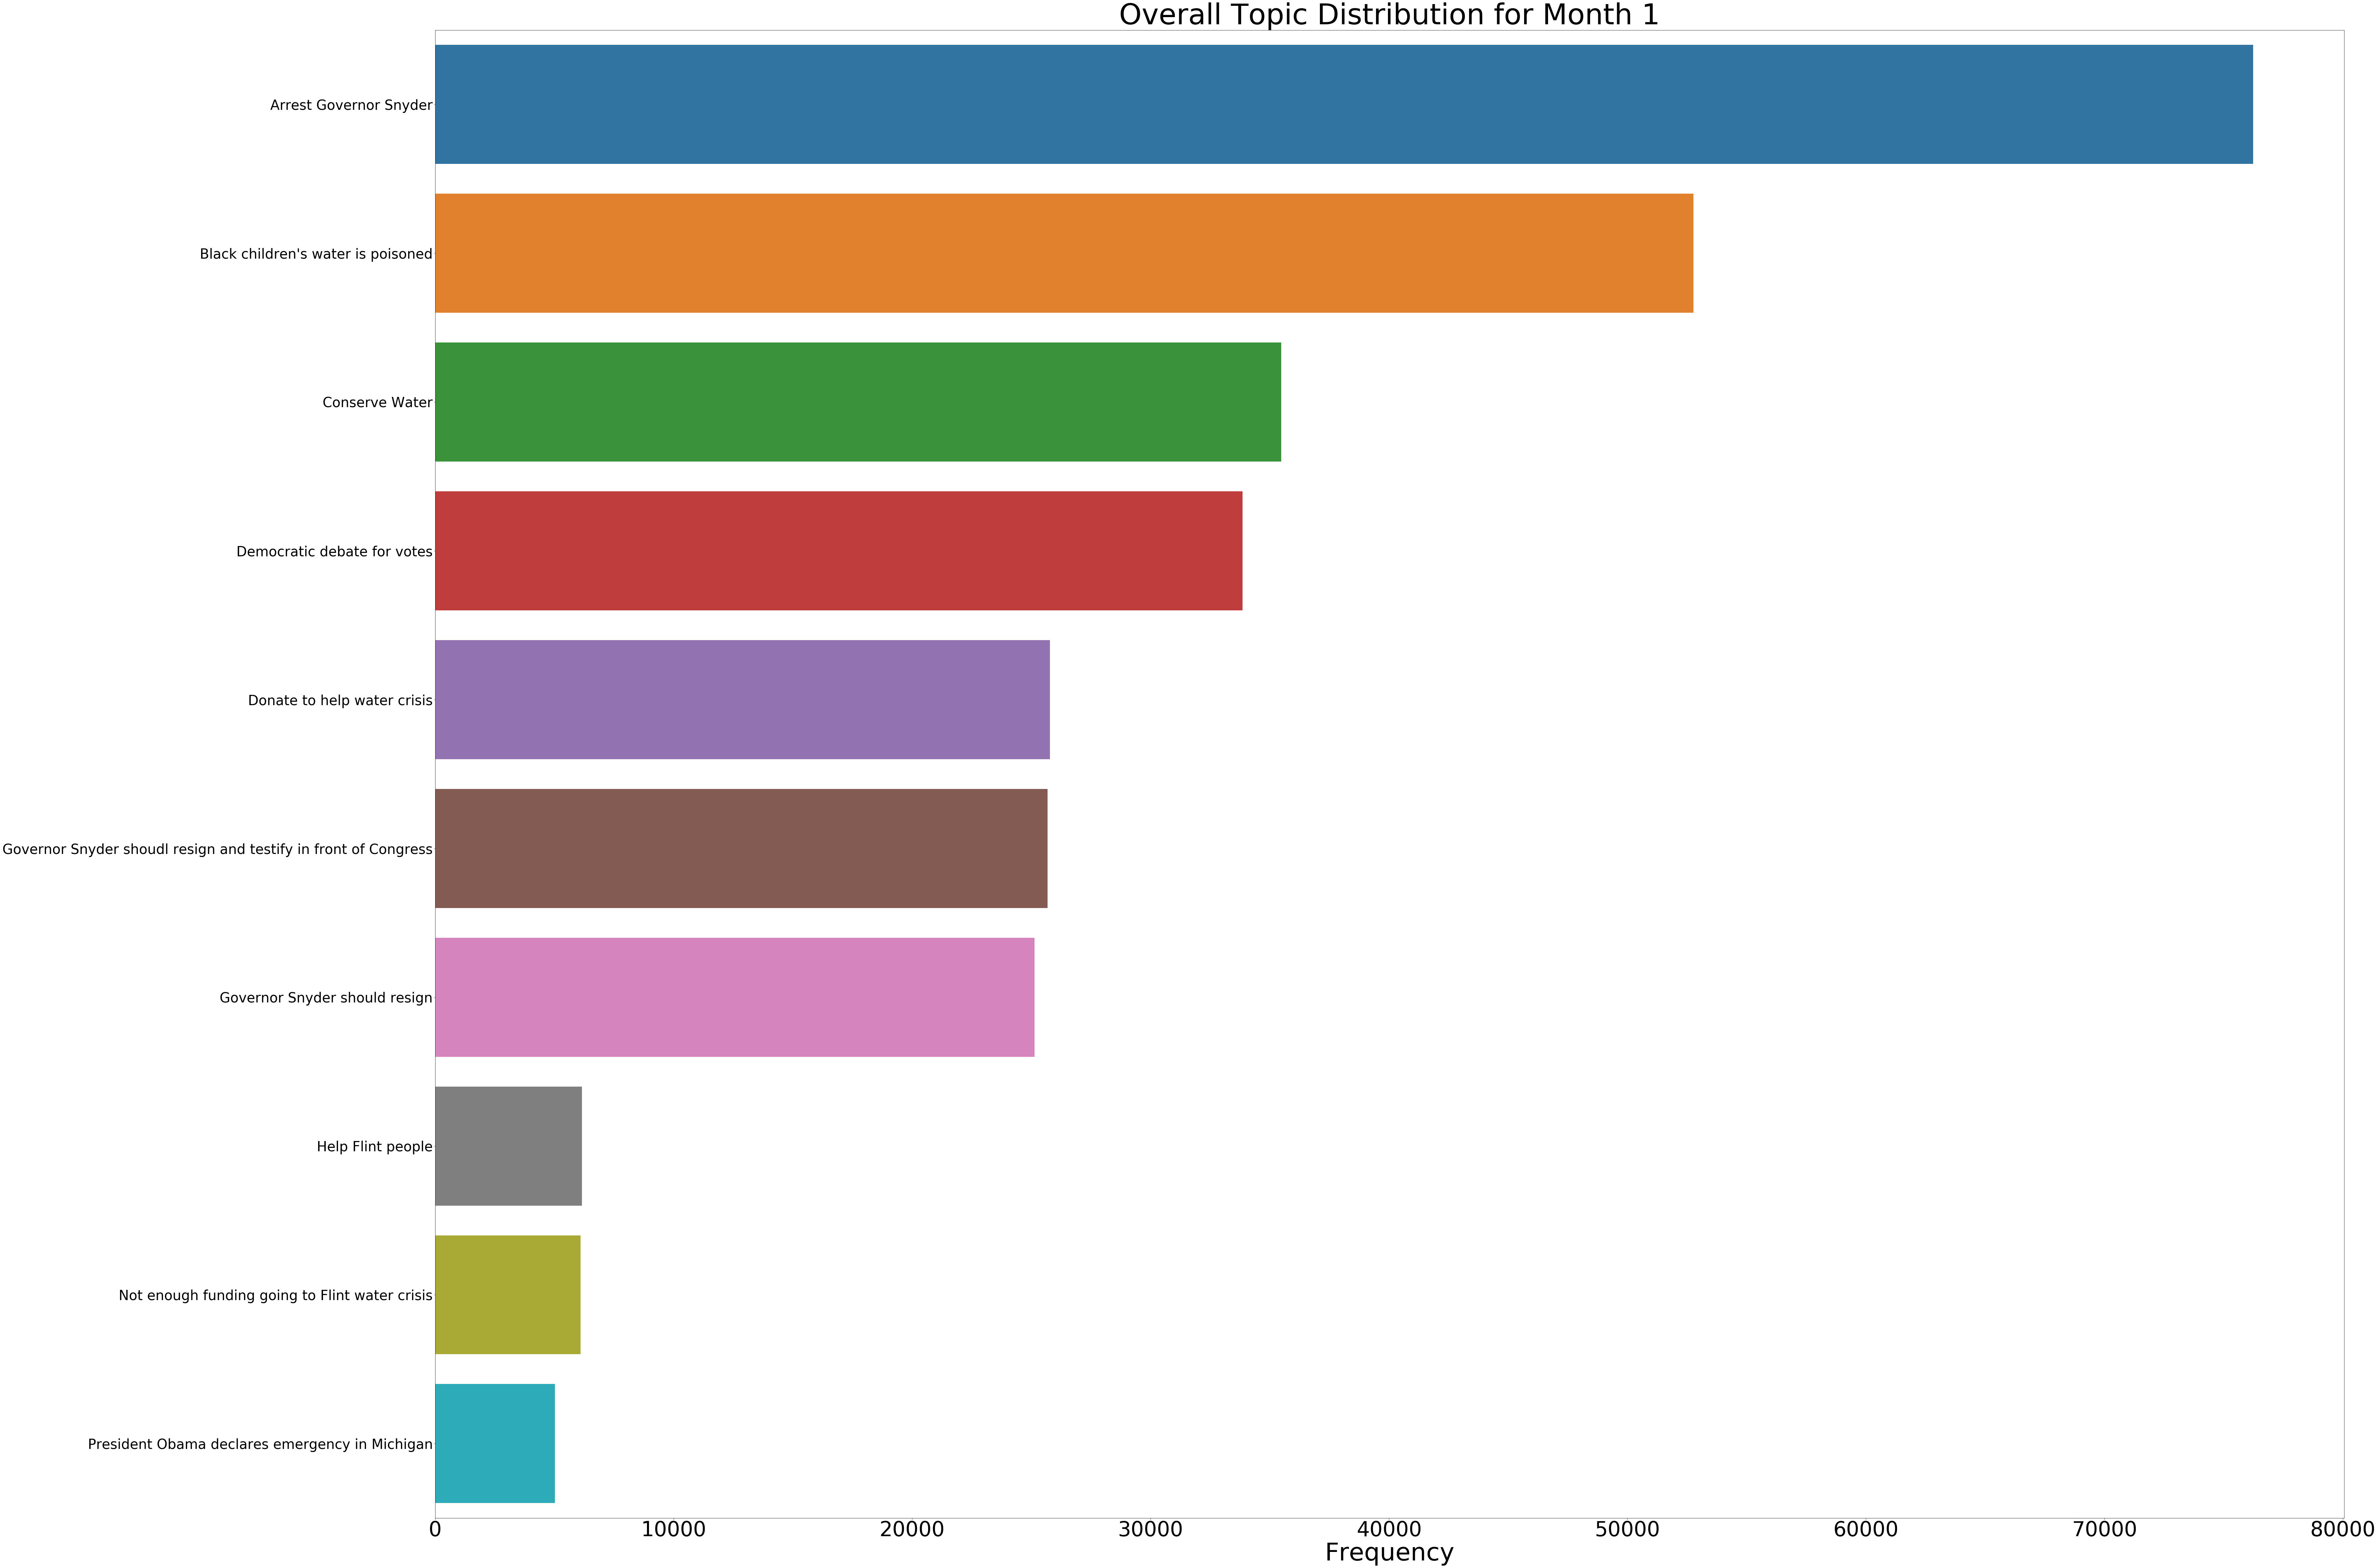

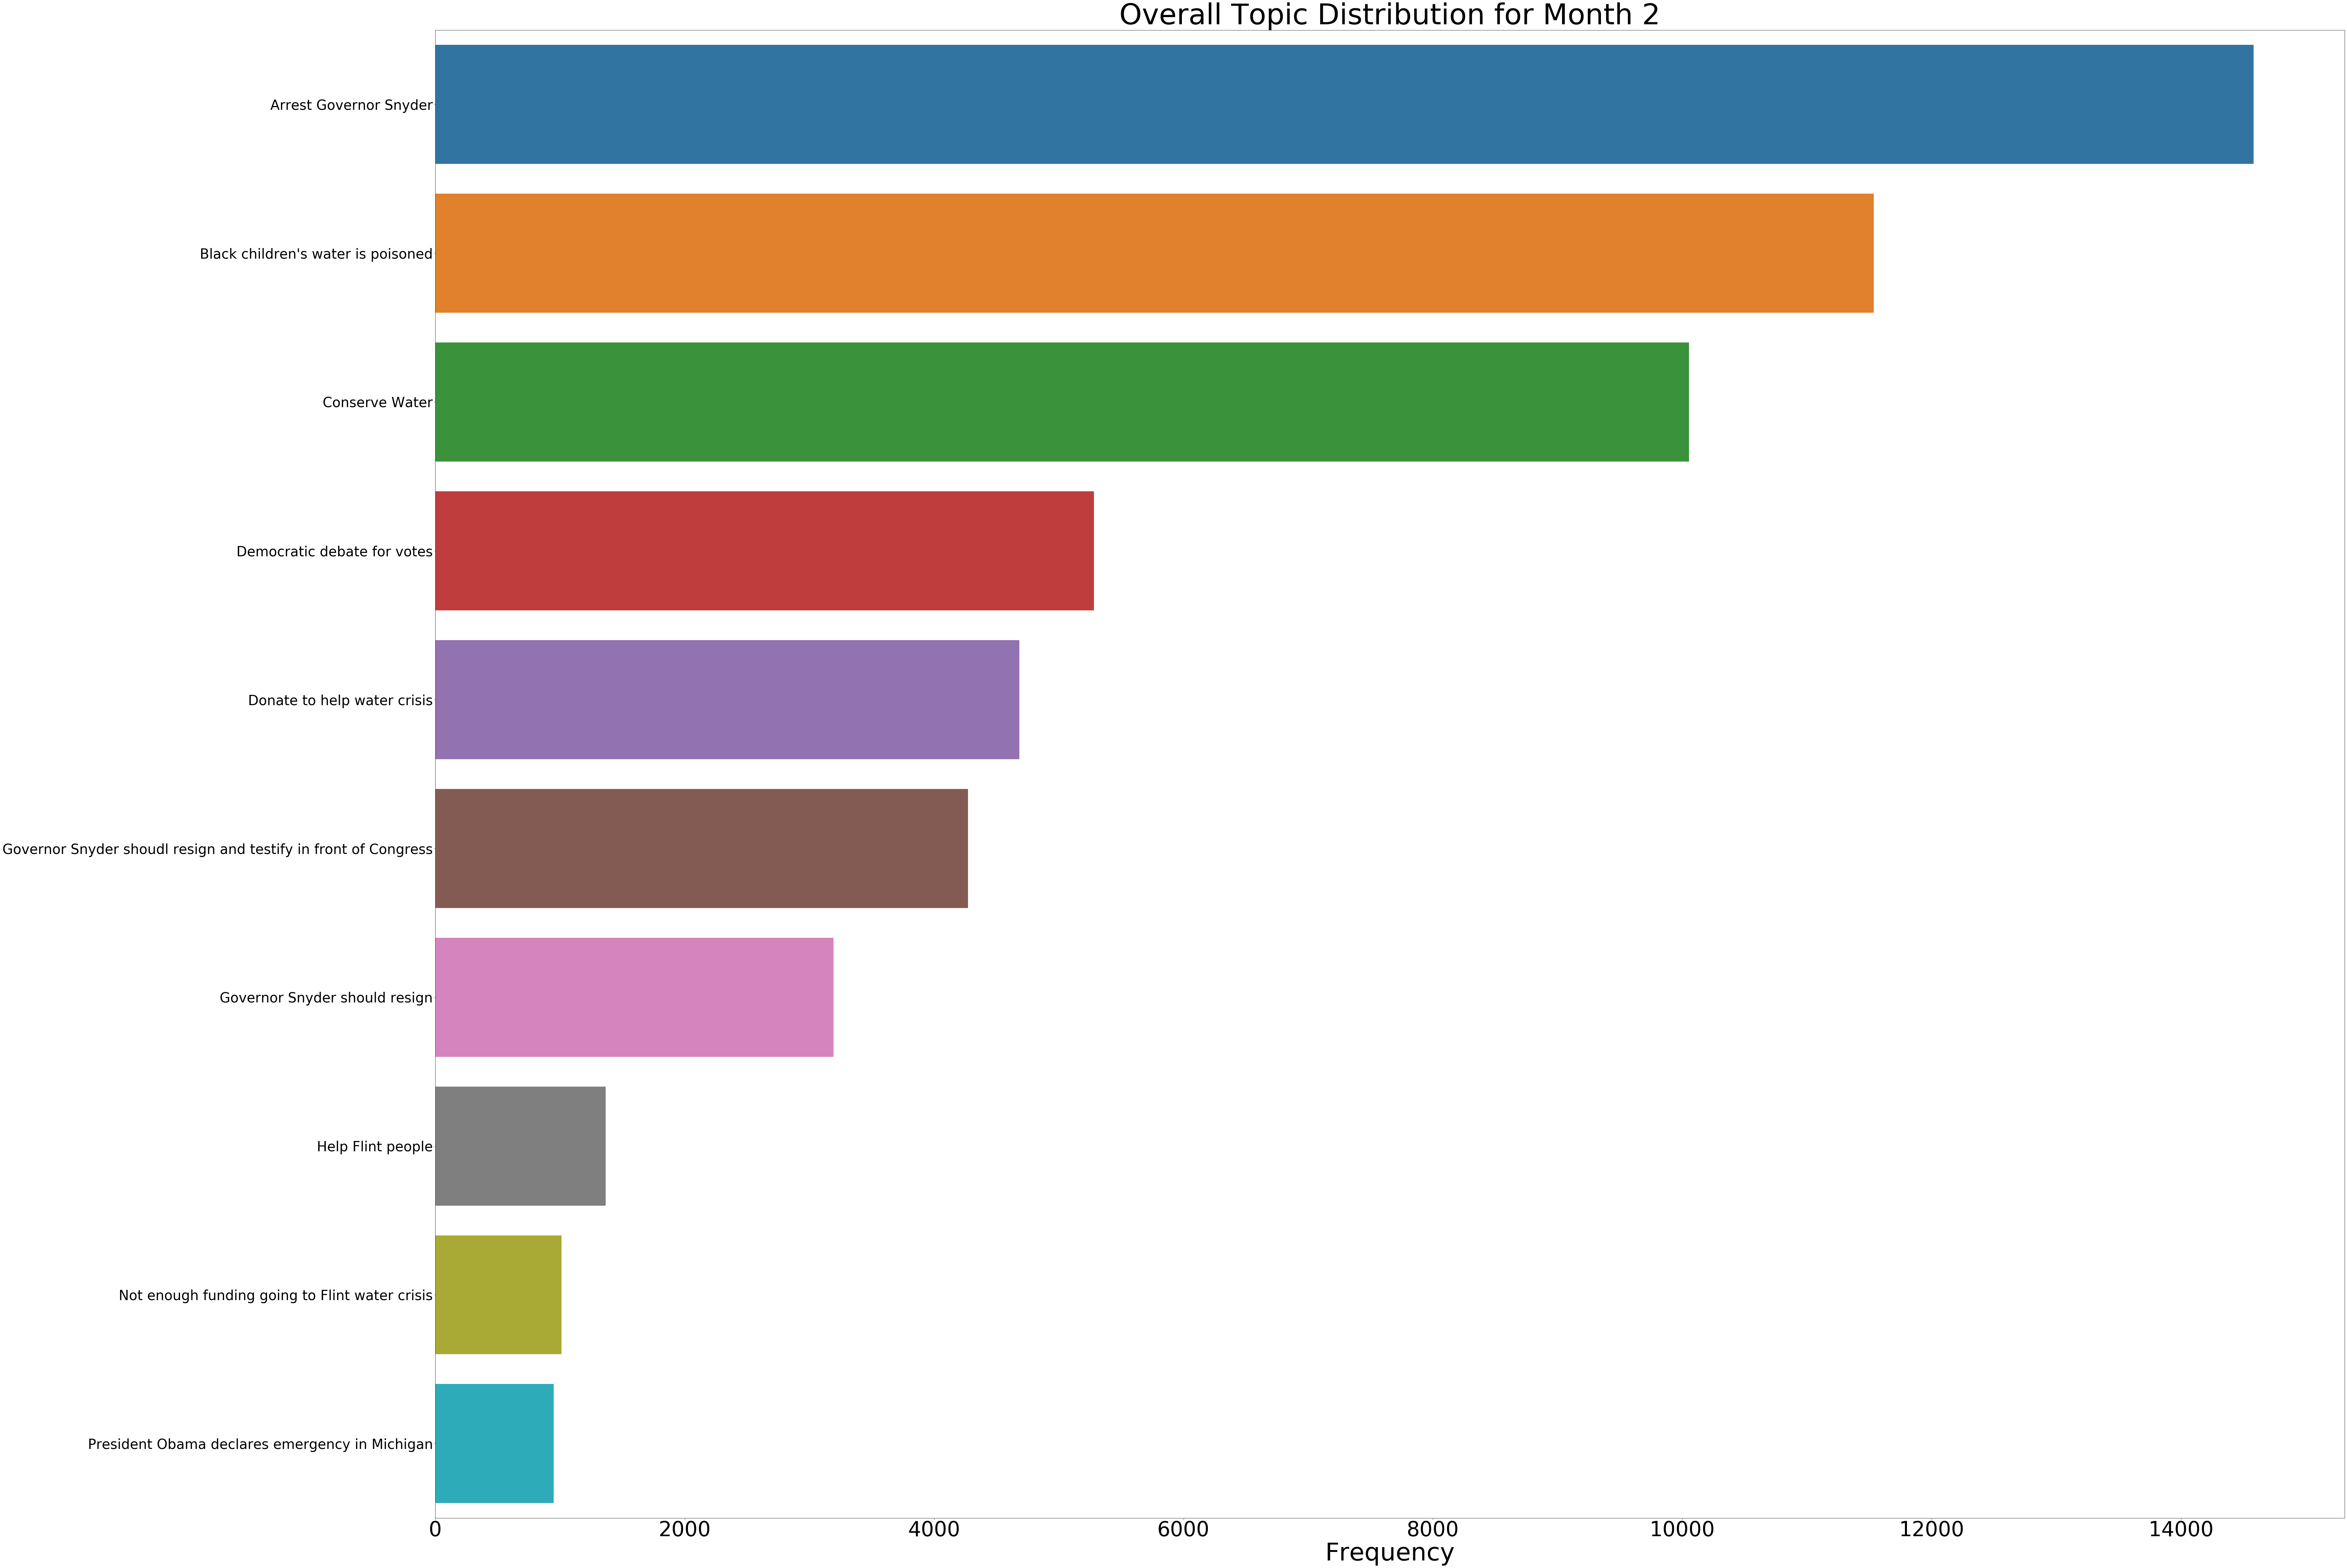

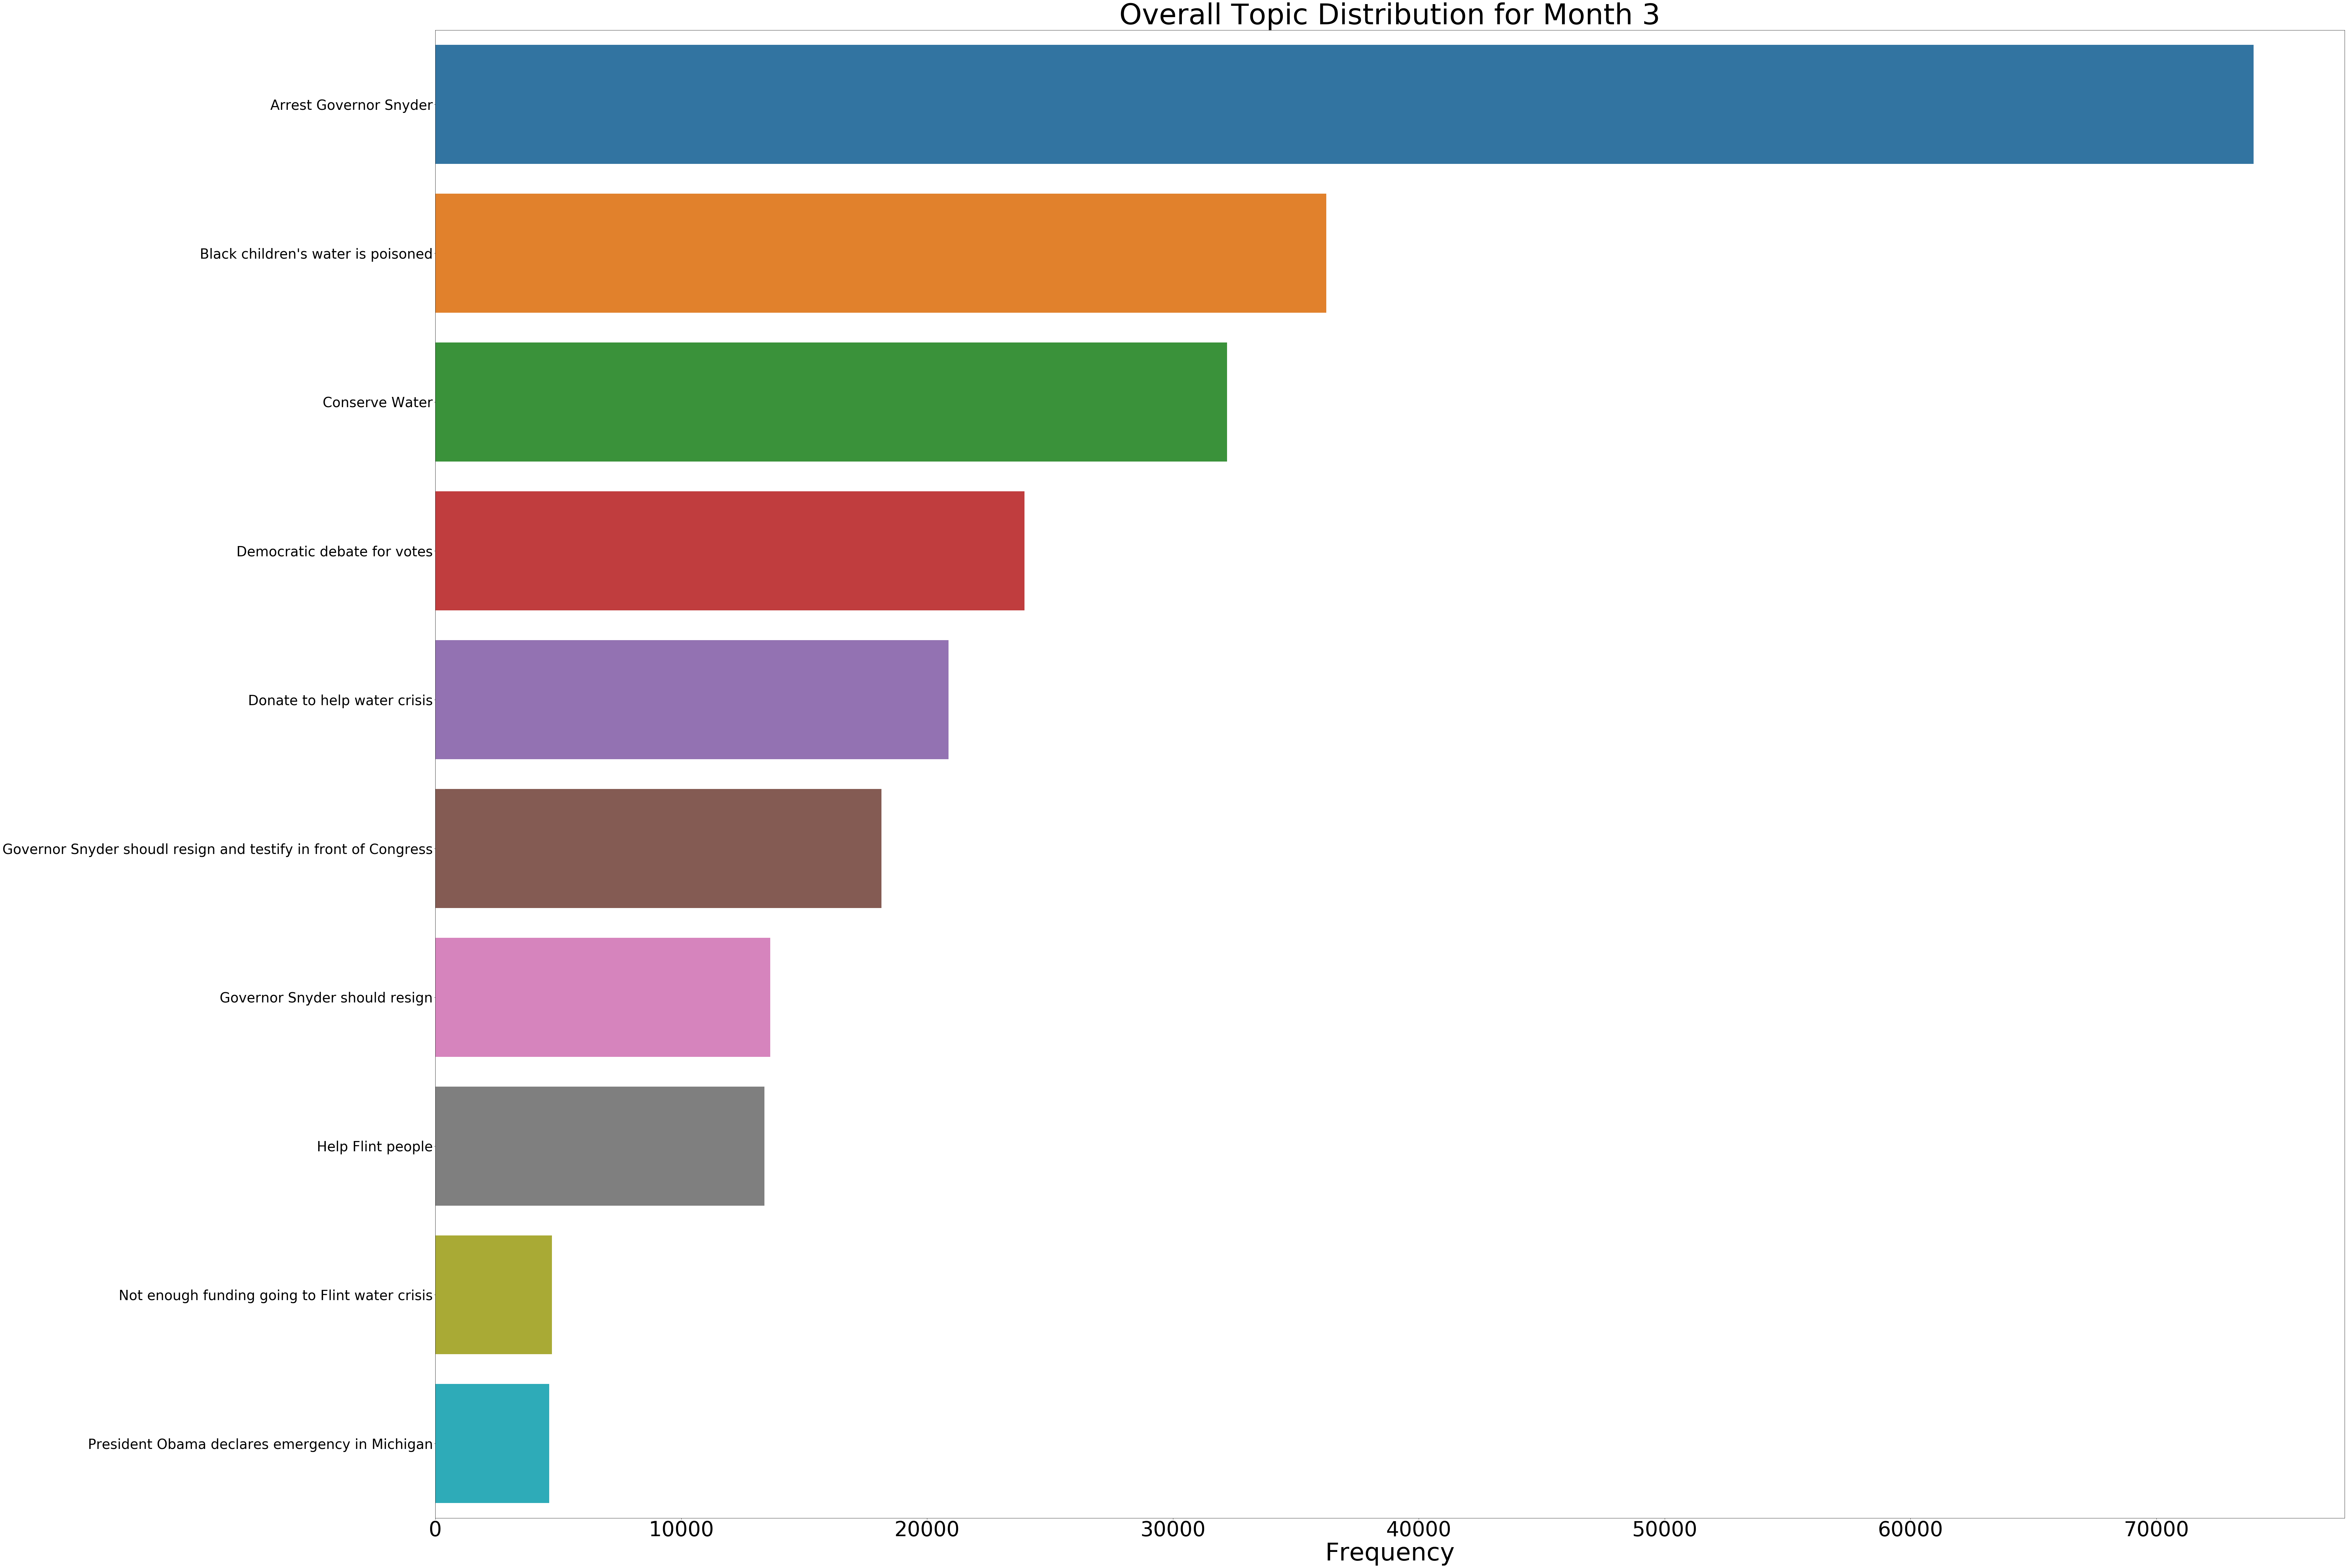

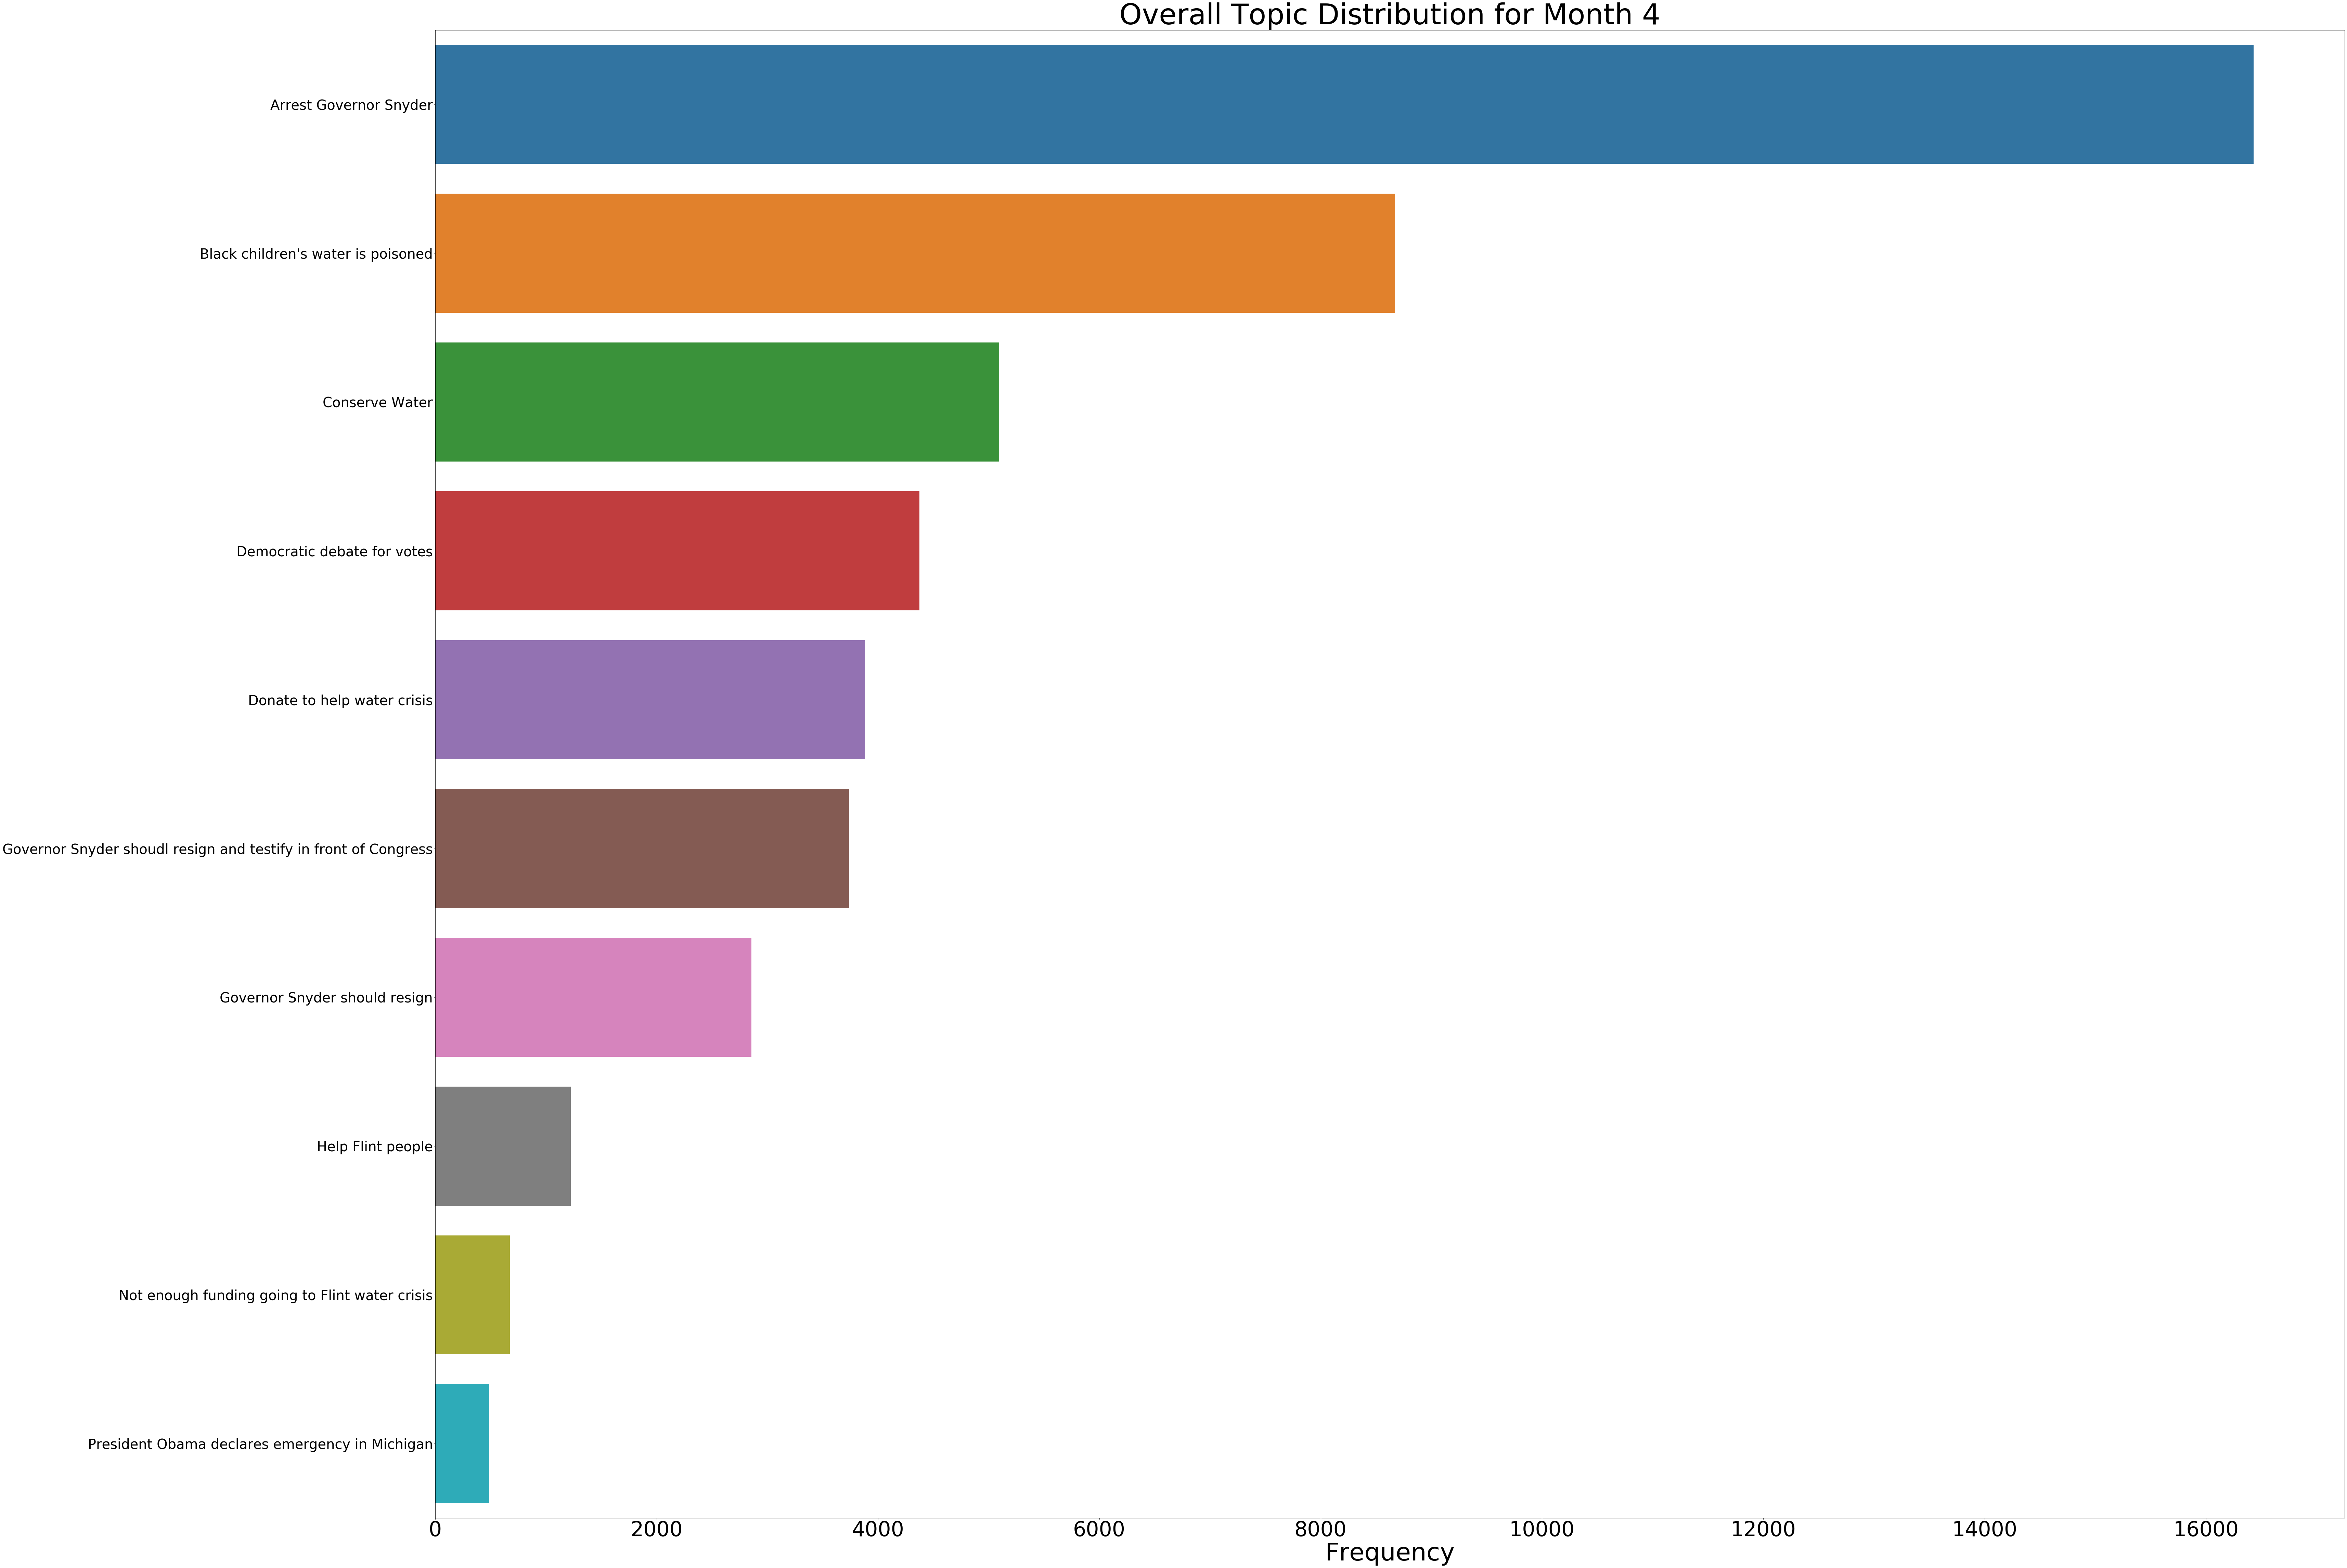

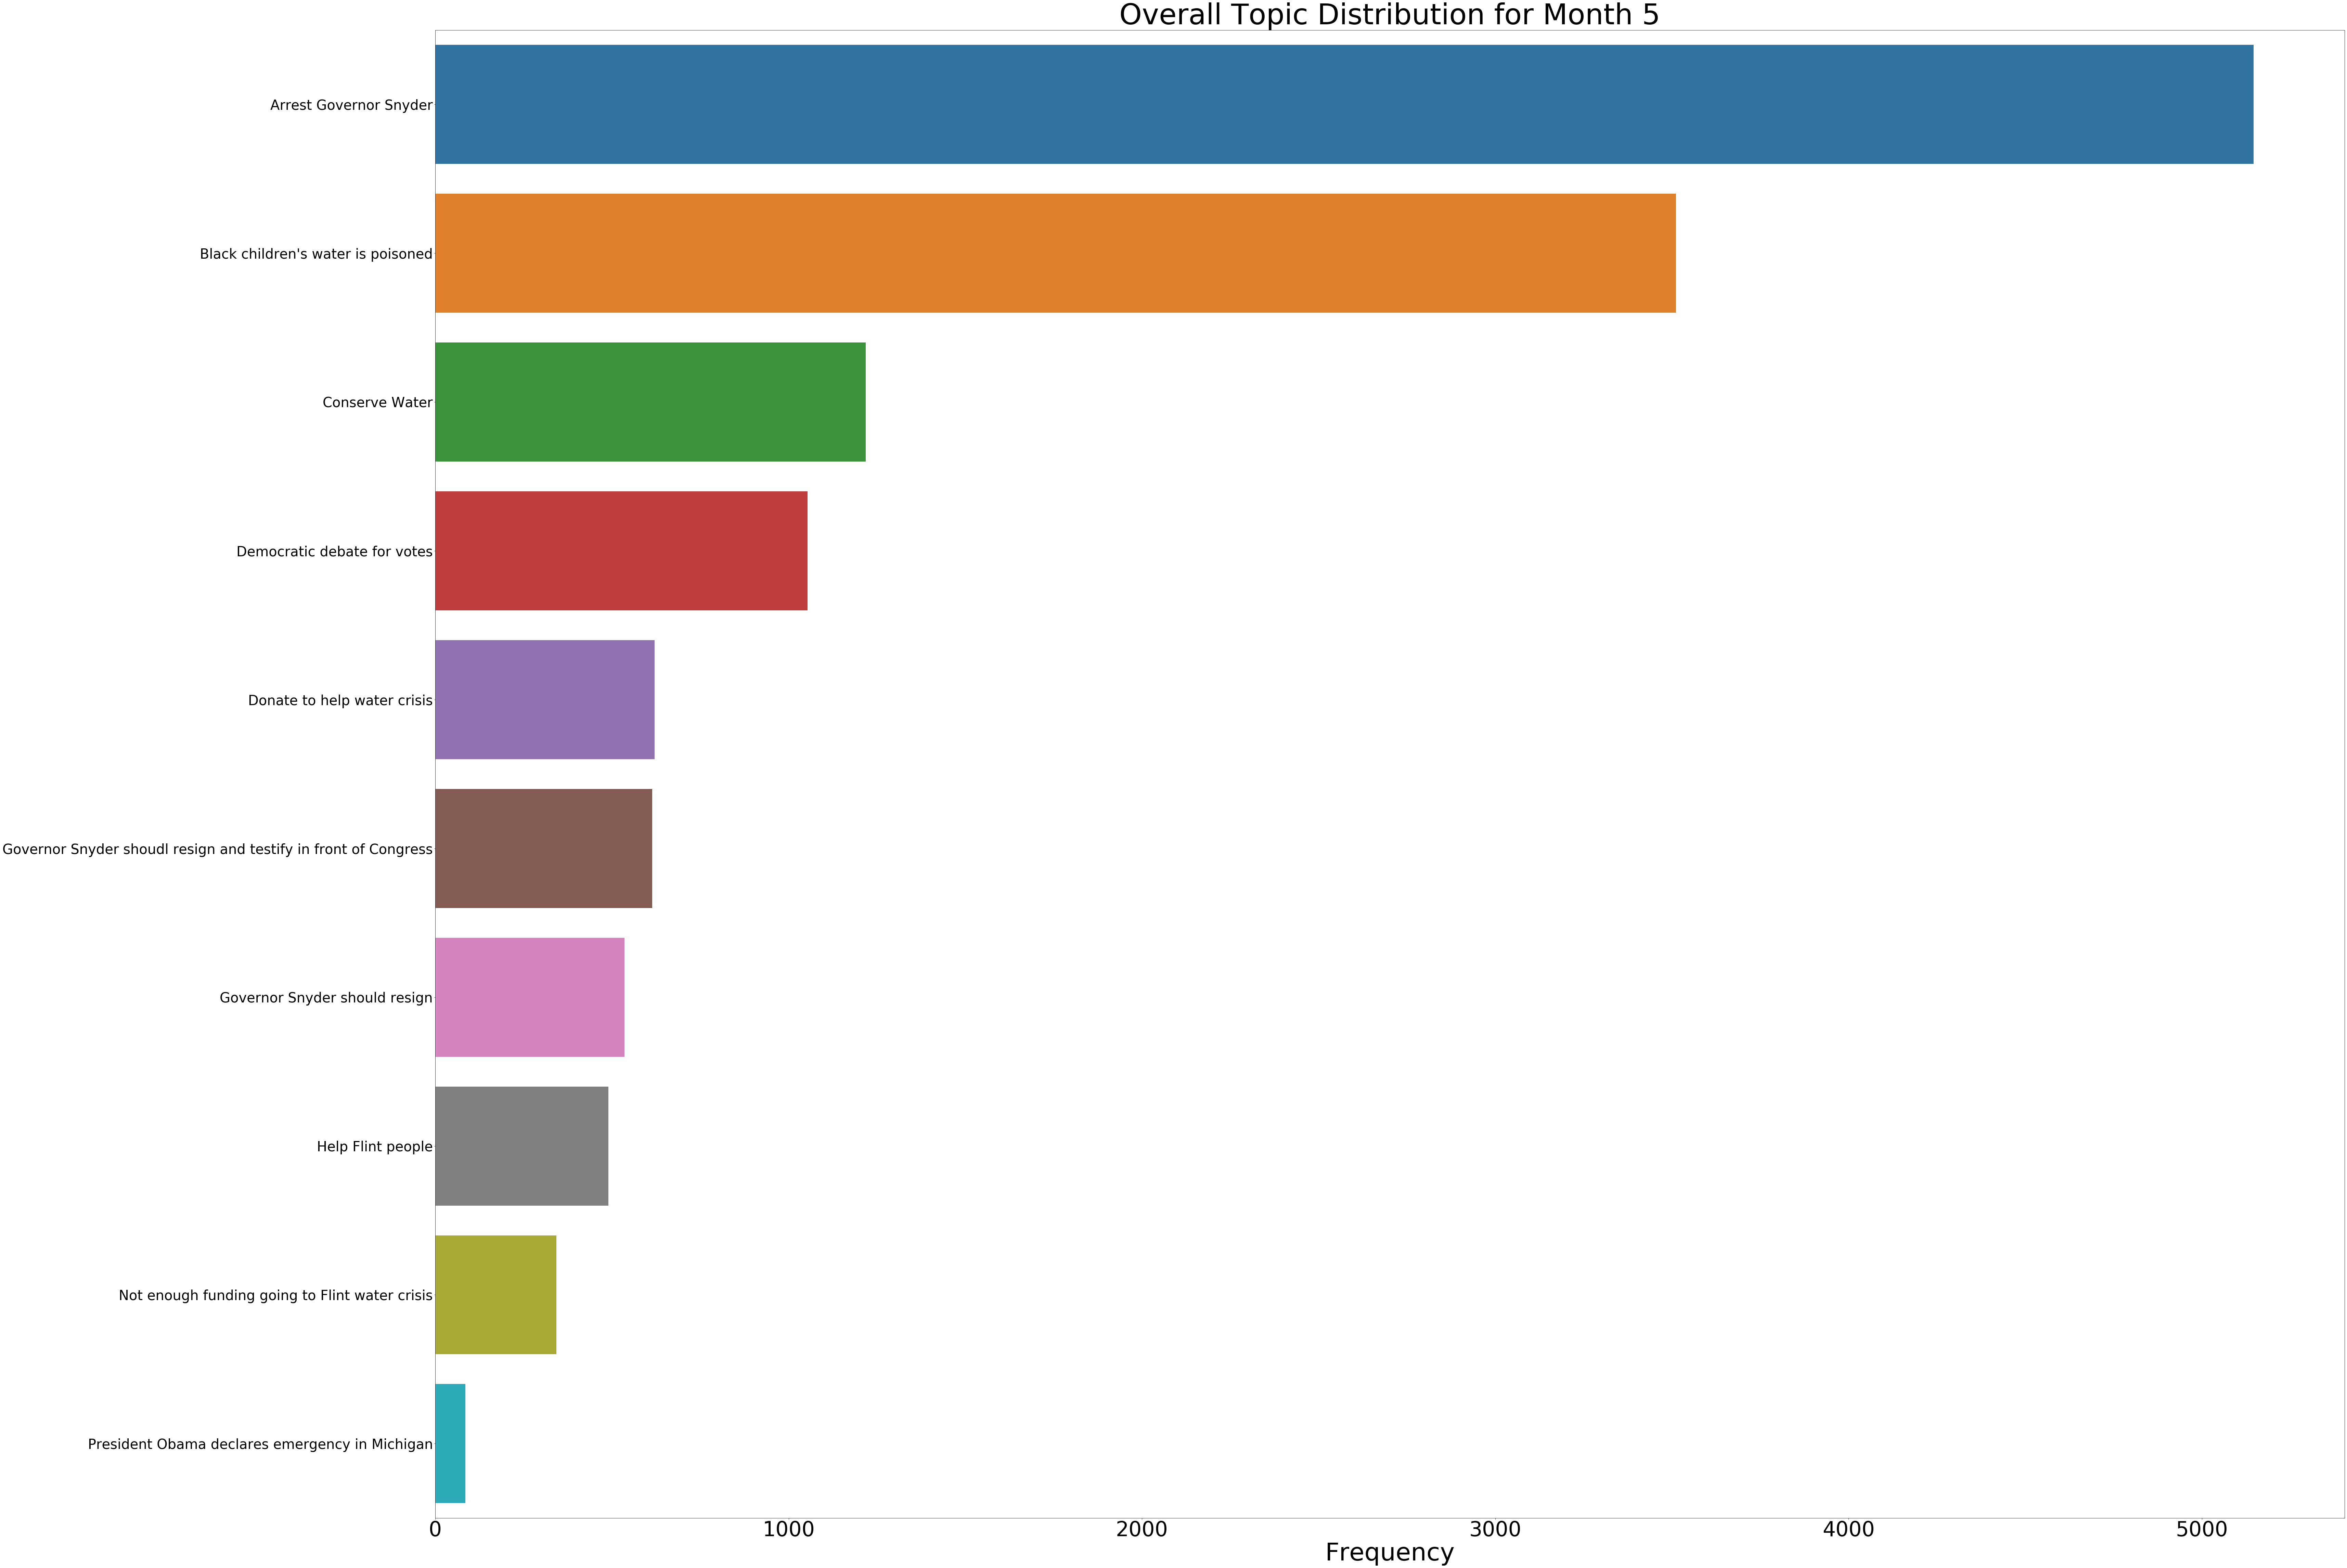

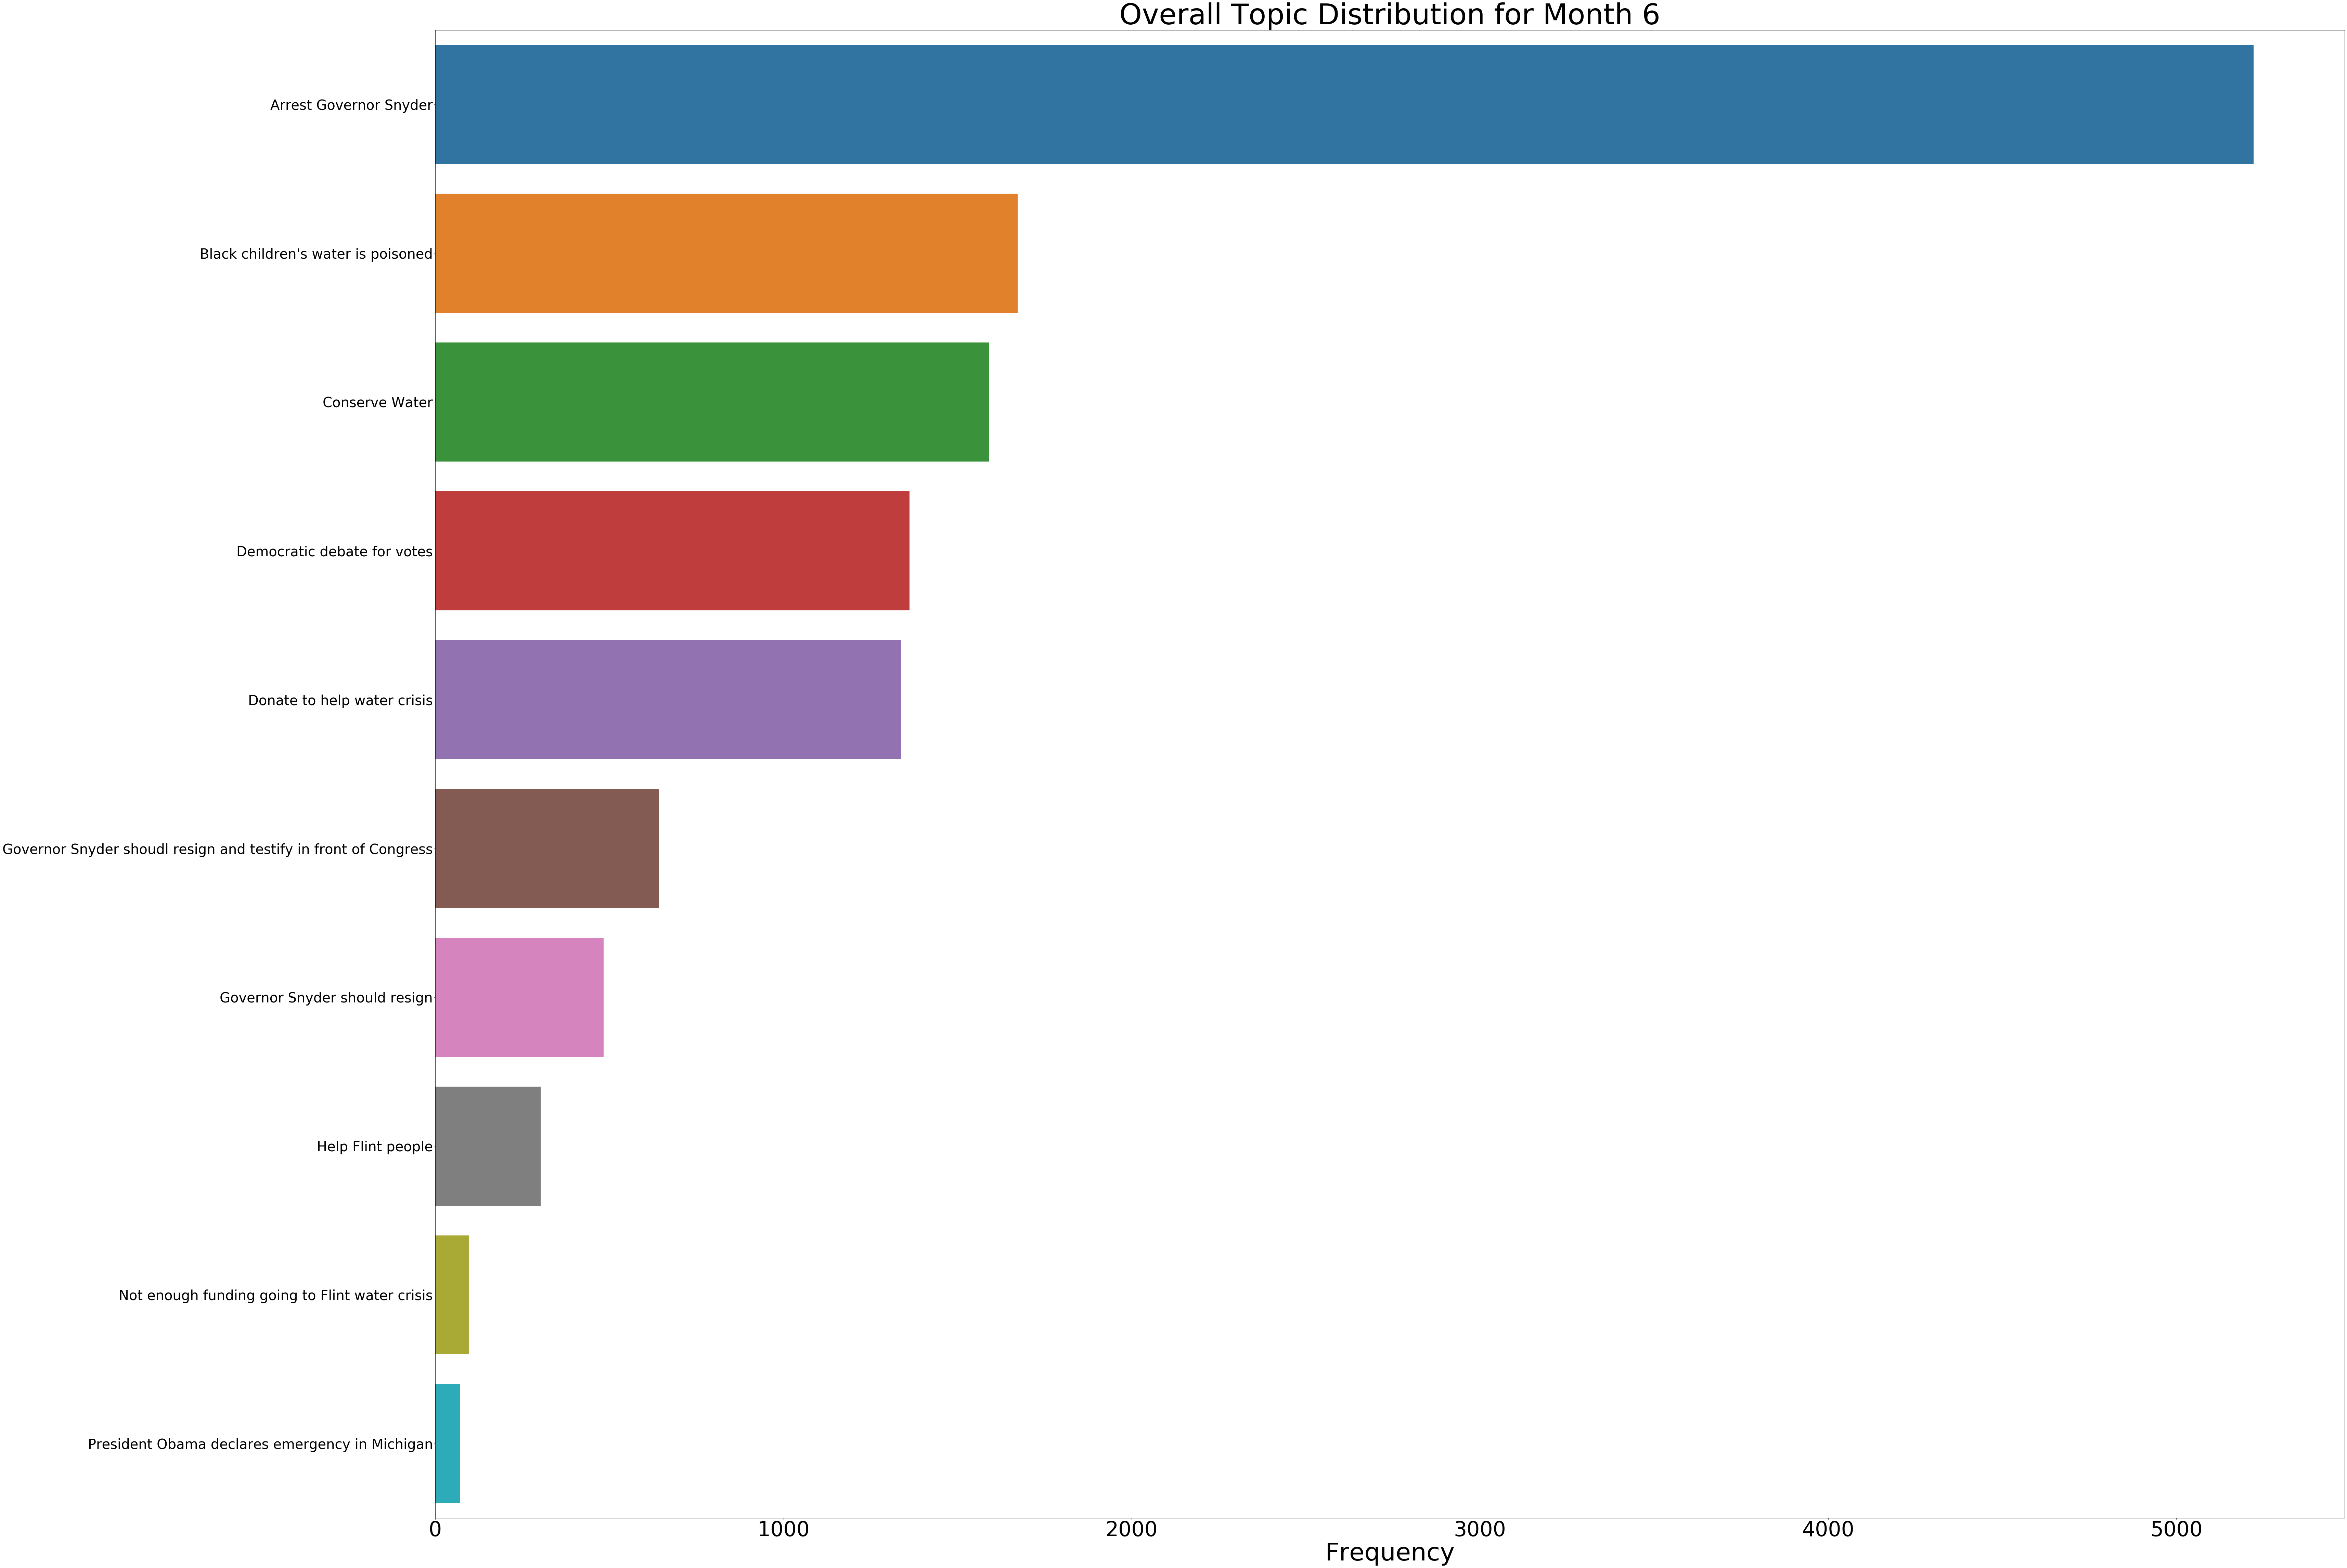

In [16]:
# shows how often each topic appears by month
for i in range(0, len(monthly_data)):
    show_topic_histograms(monthly_data[i], str(i + 1))

<h2>Topics as a Function of Time

In [20]:
# create dictionary that goes from topic --> dataframe(month, # of occurrences for topic in given month)
topic_time_df = {}
for key in nmf_remap:
    topic = nmf_remap[key]
    df_obj = pd.DataFrame(columns=['month', 'occurrences'])
    topic_time_df[topic] = df_obj

In [39]:
# calculate number of occurrences for each topic by month
for i in range(0, len(monthly_data)):
    for key in nmf_remap:
        topic = nmf_remap[key]
        month_df = monthly_data[i]
        topic_df = month_df.loc[month_df['nmf_topics'] == topic]
        topic_time_df[topic] = topic_time_df[topic].append({'month': "month " + str(i + 1), 'occurrences': len(topic_df)}, ignore_index=True)
        topic_time_df[topic][["occurrences"]] = topic_time_df[topic][["occurrences"]].apply(pd.to_numeric)

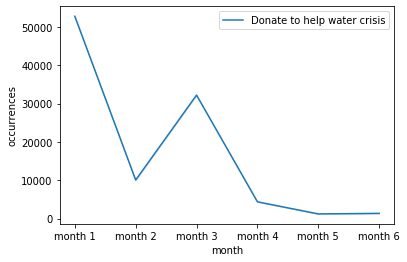

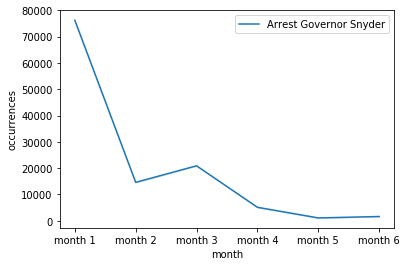

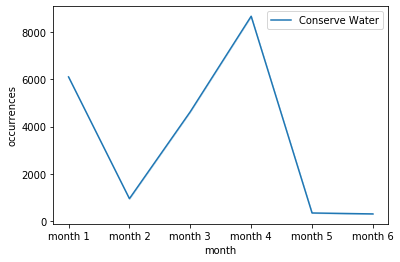

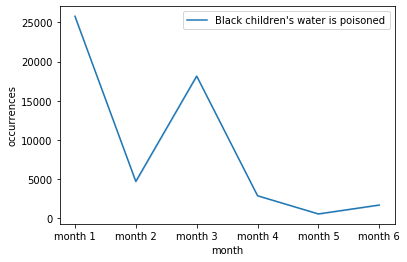

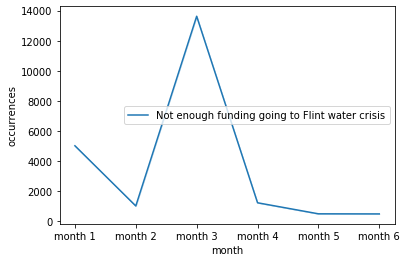

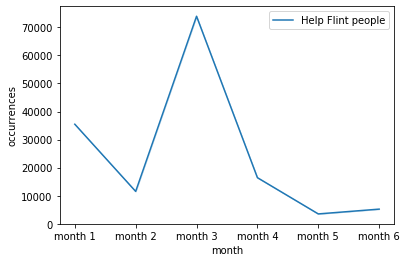

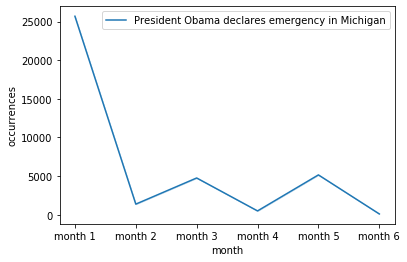

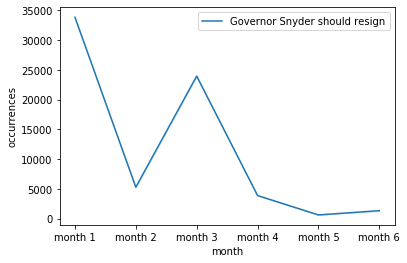

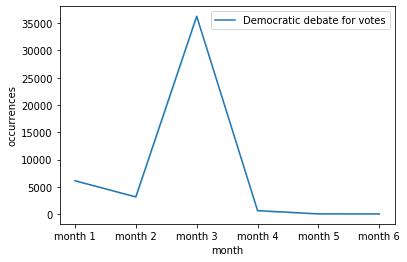

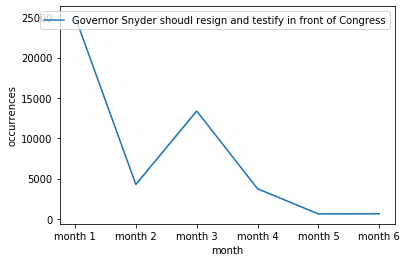

In [50]:
# make a line plot for how these topics change through time
for key in nmf_remap:
    topic = nmf_remap[key]
    monthly_topic_df = topic_time_df[topic]
    plt.figure()
    ax = sns.lineplot(x="month", y="occurrences", data=monthly_topic_df)
    ax.legend([topic])

In [51]:
len(cleaned_df.index)


664775